In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
print('Number of days',data['Date'].nunique())

Number of days 189


In [2]:
# Dictionary for activity label to integer conversion
activities = list(data['Activity'].unique())
act_to_ix = {activity:index for index, activity in enumerate(sorted(activities))}
print(activities)
print(act_to_ix)

['Sleeping', 'Bed_to_Toilet', 'Meal_Preparation', 'Relax', 'Housekeeping', 'Eating', 'Wash_Dishes', 'Leave_Home', 'Enter_Home', 'Work']
{'Bed_to_Toilet': 0, 'Eating': 1, 'Enter_Home': 2, 'Housekeeping': 3, 'Leave_Home': 4, 'Meal_Preparation': 5, 'Relax': 6, 'Sleeping': 7, 'Wash_Dishes': 8, 'Work': 9}


In [4]:
def data_processing(dataframe, activity):
    starts = []
    durations = []
    activity_dataframe = dataframe[dataframe['Activity'] == activity].copy()
    activity_dataframe.index = np.arange(len(activity_dataframe))
    for i in range(len(activity_dataframe)):
        start = activity_dataframe['start hour'][i]*60 + activity_dataframe['start min'][i]
        end = activity_dataframe['end hour'][i]*60 + activity_dataframe['end min'][i]
  
        duration = end - start
        if duration < 0:
            duration += 1440
        starts.append(start)
        durations.append(duration)
    
    return starts, durations
starts_activity = []
durations_activity = []

for activity in data['Activity'].unique():
    starts, durations = data_processing(data,activity)
    starts_activity.ap

print(len(starts))
print(len(durations))

print(starts)
print(durations)

Sleeping
Bed_to_Toilet
Meal_Preparation
Relax
Housekeeping
Eating
Wash_Dishes
Leave_Home
Enter_Home
Work
331
331
[3, 343, 0, 261, 1368, 267, 33, 334, 1438, 9, 1407, 316, 1360, 275, 1436, 322, 1358, 1434, 335, 1428, 39, 1422, 25, 182, 15, 343, 14, 38, 214, 1418, 21, 1314, 1341, 348, 27, 357, 21, 40, 342, 49, 356, 1435, 325, 34, 99, 17, 40, 366, 1350, 1409, 276, 16, 43, 15, 456, 1356, 1381, 279, 1338, 262, 1429, 23, 317, 1360, 248, 1405, 192, 1388, 100, 1407, 1426, 230, 1335, 186, 8, 383, 9, 43, 316, 33, 1439, 369, 57, 89, 427, 108, 448, 1433, 24, 317, 36, 11, 55, 371, 3, 34, 313, 1358, 205, 1421, 1400, 301, 1331, 40, 1436, 266, 46, 73, 378, 16, 345, 22, 8, 357, 1362, 26, 438, 32, 353, 1409, 334, 9, 249, 19, 370, 7, 1403, 1368, 340, 6, 348, 1, 19, 298, 40, 371, 3, 267, 90, 4, 90, 359, 1325, 1436, 151, 70, 1359, 40, 312, 1, 1383, 46, 334, 1315, 212, 20, 33, 254, 1352, 127, 1422, 338, 59, 353, 9, 270, 1428, 28, 7, 277, 1255, 463, 16, 290, 16, 307, 8, 8, 1380, 296, 3, 284, 21, 154, 70, 1438

331


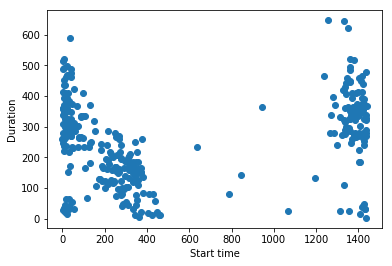

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(starts,durations)
plt.xlabel('Start time')
plt.ylabel('Duration')
print(len(starts))

In [5]:
from sklearn.cluster import KMeans

X = np.array([starts, durations]).T

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
center = kmeans.cluster_centers_

labels = kmeans.labels_

cluster1_indices = np.where(labels == 0)[0]
cluster2_indices = np.where(labels == 1)[0]

cluster1_data = []
for index in cluster1_indices:
    cluster1_data.append(X[index,:])
    
cluster2_data = []
for index in cluster2_indices:
    cluster2_data.append(list(X[index,:]))

cluster1_data = np.array(cluster1_data)
cluster2_data = np.array(cluster2_data)

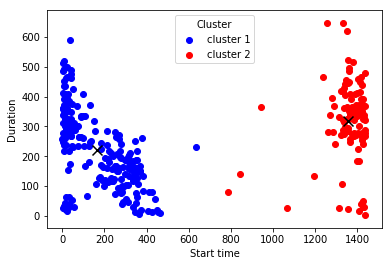

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(cluster1_data[:,0],cluster1_data[:,1],color ='blue',label='cluster 1')
plt.scatter(cluster2_data[:,0],cluster2_data[:,1],color = 'red',label='cluster 2')
plt.xlabel('Start time')
plt.ylabel('Duration')
plt.scatter(center[0,0],center[0,1],color='black',marker='x',s=100)
plt.scatter(center[1,0],center[1,1],color='black',marker='x',s=100)
plt.legend(title='Cluster')
plt.show()

In [7]:
mean_cluster1 = np.mean(cluster1_data,axis=0)
std_cluster1 = np.std(cluster1_data,axis=0)
print(mean_cluster1)
print(std_cluster1)

[166.67117117 219.63513514]
[143.56285304 125.55680395]


In [8]:
mean_cluster2 = np.mean(cluster2_data,axis=0)
std_cluster2 = np.std(cluster2_data,axis=0)
print(mean_cluster2)
print(std_cluster2)

[1358.42201835  319.11926606]
[101.81646499 132.03389367]


In [9]:
def classifier(data_point):
    start, duration = data_point
    # Cluster 1 mean and std for start time and duration
    mean_start1 = mean_cluster1[0]
    mean_duration1 = mean_cluster1[1]
    
    std_start1 = std_cluster1[0]
    std_duration1 = std_cluster1[1]
    
    # Cluster 2 mean and std for start time and duration
    mean_start2 = mean_cluster2[0]
    mean_duration2 = mean_cluster2[1]
    
    std_start2 = std_cluster2[0]
    std_duration2 = std_cluster2[1]
    
    if ((mean_start1 - 2*std_start1) <= start <= (mean_start1 + 2*std_start1)) and ((mean_duration1 - 2*std_duration1) <= duration <= (mean_duration1 + 2*std_duration1)):
        classlabel = 1
    elif ((mean_start2 - 2*std_start2) <= start <= (mean_start2 + 2*std_start2)) and ((mean_duration2 - 2*std_duration2) <= duration <= (mean_duration2 + 2*std_duration2)):  
        classlabel = 2
        
    else:
        classlabel = 0
    
    return classlabel


In [10]:
normal_starts = np.load('normal_starts.npy')
abnormal_starts = np.load('abnormal_starts.npy')
durations = np.load('durations.npy')

In [11]:
results_abnormal = []
for i in range(len(normal_starts)):
    results_abnormal.append(classifier((abnormal_starts[i],durations[i])))

In [12]:
results_normal = []
for i in range(len(normal_starts)):
    results_normal.append(classifier((normal_starts[i],durations[i])))

In [13]:
mis_counter = 0
results_abnormal = np.array(results_abnormal)
mis_counter += len(results_abnormal[results_abnormal != 0])
results_normal = np.array(results_normal)
mis_counter += len(results_normal[results_normal == 0])
accuracy = (len(abnormal_starts)*2 - mis_counter)/(len(abnormal_starts)*2)*100
print(accuracy)

93.57142857142857


In [14]:
len(abnormal_starts)

70